In [2]:
#need to remove outliers
import pandas as pd
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sc

plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

In [3]:
path = r"./dataFolders/Output/Step6_v5/"
learning_data = pd.read_csv(path + 'AllLight_EveryMoth.csv')
learning_data = learning_data.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1'])
learning_data.head()

,In_Frame,Out_Frame,Proboscis,DiscoveryTime,trialNum,name
0,20377,20713,NaN,NaN,0,L0.1_c-3_m10
1,39912,41054,NaN,NaN,1,L0.1_c-3_m10
2,41723,41890,NaN,NaN,2,L0.1_c-3_m10
3,67784,69028,NaN,NaN,3,L0.1_c-3_m10
4,103803,104034,NaN,NaN,4,L0.1_c-3_m10


In [4]:
temp = learning_data['name'].str.split('_', 1, expand = True)
learning_data['lightLevel'] = temp[0]

In [5]:
learning_data.head()

,In_Frame,Out_Frame,Proboscis,DiscoveryTime,trialNum,name,lightLevel
0,20377,20713,NaN,NaN,0,L0.1_c-3_m10,L0.1
1,39912,41054,NaN,NaN,1,L0.1_c-3_m10,L0.1
2,41723,41890,NaN,NaN,2,L0.1_c-3_m10,L0.1
3,67784,69028,NaN,NaN,3,L0.1_c-3_m10,L0.1
4,103803,104034,NaN,NaN,4,L0.1_c-3_m10,L0.1


In [6]:
for l, light_df in learning_data.groupby('lightLevel'):
    N = len(light_df.name.unique())
    print('%s has %i number of moths interact with flowers' %(l, N))

L0.1 has 29 number of moths interact with flowers
L50 has 26 number of moths interact with flowers


## create visit stats

In [13]:
moth = []
n = []
s = []
for m, moth_df in learning_data.groupby('name'):
    totalVisit = np.max(moth_df.trialNum)+1
    suc = moth_df['DiscoveryTime'].count() / moth_df['trialNum'].count()
    
    moth.append(m)
    n.append(totalVisit)
    s.append(suc)

In [14]:
temp = pd.DataFrame({'name': moth,
             'num_visit': n,
             'fraction_successful': s})
temp['lightLevel'] = temp.name.str.split('_', n = 2, expand = True)[0]

In [16]:
temp.to_csv(path + 'VisitInfo.csv')

## stats on data

In [18]:
data = pd.read_csv(path + 'VisitInfo.csv')

In [19]:
low_visit_num = data.loc[data.lightLevel == 'L0.1', 'num_visit'].values
high_visit_num = data.loc[data.lightLevel == 'L50', 'num_visit'].values

print(sc.stats.ks_2samp(low_visit_num, high_visit_num))
print(sc.stats.mannwhitneyu(low_visit_num, high_visit_num))

KstestResult(statistic=0.3050397877984085, pvalue=0.12053515381272795)
MannwhitneyuResult(statistic=290.5, pvalue=0.07310017888999944)


In [21]:
low_fraction = data.loc[data.lightLevel == 'L0.1', 'fraction_successful'].values
high_fraction = data.loc[data.lightLevel == 'L50', 'fraction_successful'].values

print(sc.stats.ks_2samp(low_fraction, high_fraction))
print(sc.stats.mannwhitneyu(low_fraction, high_fraction))

KstestResult(statistic=0.3169761273209549, pvalue=0.09826619619156529)
MannwhitneyuResult(statistic=254.5, pvalue=0.0183374265267733)


# plot this Data

In [22]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [23]:
#define the colors for low and high light levels
mc = {'L0.1': 'black', 'L50':'grey' }
c = {'L0.1': 'mediumpurple', 'L50':'darkorange'}
boxprops = {'edgecolor': 'k', 'linewidth': 2,'alpha': 1}
lineprops = {'color': 'k', 'linewidth': 2}
capprops = {'linewidth': 0}

bkwargs = {'palette': c, 'order': ['L0.1', 'L50']}
skwargs =  {'palette': mc, 'order': ['L0.1', 'L50']}
boxplot_kwargs = dict({'boxprops': boxprops, 'medianprops': lineprops,
                       'whiskerprops': lineprops, 'capprops': capprops,
                       'width': 0.4},
                      **bkwargs)
stripplot_kwargs = dict({'linewidth': 0.6, 'size': 6, 'alpha': 0.8},
                        **skwargs)

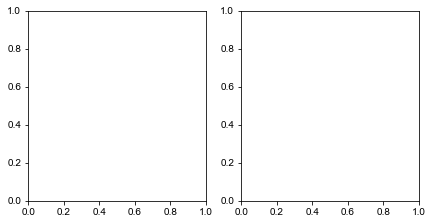

In [24]:
w = 7
h = 7/2
f, [ax0, ax1] = plt.subplots(1,2, figsize = (w,h))

In [25]:
# plot graph for number of visit

sns.boxplot(ax = ax0, x = 'lightLevel', y = 'num_visit', data = data,
           fliersize=0, **boxplot_kwargs)
sns.stripplot(ax = ax0, x = 'lightLevel', y = 'num_visit', data = data,
              dodge=True, **stripplot_kwargs)

<AxesSubplot:xlabel='lightLevel', ylabel='num_visit'>

In [26]:
# plot graph for fraction successful

sns.boxplot(ax = ax1, x = 'lightLevel', y = 'fraction_successful', data = data,
           fliersize=0, **boxplot_kwargs)
sns.stripplot(ax = ax1, x = 'lightLevel', y = 'fraction_successful', data = data,
              dodge=True, **stripplot_kwargs)

<AxesSubplot:xlabel='lightLevel', ylabel='fraction_successful'>

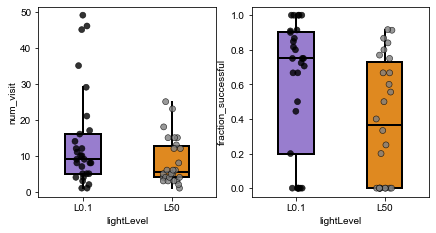

In [27]:
f

In [29]:
f.savefig(path + 'Figure/visitInfo.pdf')